In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score

import statsmodels.api as sm

In [26]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [27]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [28]:
import pickle
X_train= pd.read_pickle('pkls/price_split/X_lt_train.pkl')
y_train= pd.read_pickle('pkls/price_split/y_lt_train.pkl')
X_test= pd.read_pickle('pkls/price_split/X_lt_test.pkl')
y_test= pd.read_pickle('pkls/price_split/y_lt_test.pkl')

In [29]:
X_test.head().T

,3038,4291,1872,3107,2817
host_is_superhost,1.0,1.0,1.0,1.0,0.0
host_identity_verified,1.0,1.0,1.0,1.0,1.0
accommodates,4.0,2.0,4.0,1.0,1.0
bathrooms,1.0,1.0,1.0,1.0,1.0
bedrooms,2.0,1.0,2.0,1.0,1.0
beds,3.0,1.0,2.0,1.0,1.0
bed_type,1.0,1.0,1.0,1.0,1.0
cleaning_fee,0.0,19.0,95.0,0.0,35.0
guests_included,1.0,1.0,2.0,1.0,1.0
room_type_full,1.0,0.0,1.0,0.0,0.0


# ALL TRANSFORMATIONS FUNCTIONS  : 

# TRANSFORM ACTIONS based on PKL

In [30]:
listd_insig_cols = ['host_is_superhost','host_identity_verified','bed_type','guests_included','room_type_full',\
                    'room_type_pvt','amentcnt','ppt_condensed_apt','ppt_condensed_aptspl','ppt_condensed_auto',\
                    'ppt_condensed_hotel','ppt_condensed_other',\
                    'zipcode_94014.0', 'zipcode_94015.0', 'zipcode_94102.0',\
                    'zipcode_94103.0', 'zipcode_94104.0', 'zipcode_94105.0',\
                    'zipcode_94107.0', 'zipcode_94108.0', 'zipcode_94109.0',\
                    'zipcode_94110.0', 'zipcode_94111.0', 'zipcode_94112.0',\
                    'zipcode_94114.0', 'zipcode_94115.0', 'zipcode_94116.0',\
                    'zipcode_94117.0', 'zipcode_94118.0', 'zipcode_94121.0',\
                    'zipcode_94122.0', 'zipcode_94123.0', 'zipcode_94124.0',\
                    'zipcode_94127.0', 'zipcode_94129.0', 'zipcode_94131.0',\
                    'zipcode_94132.0', 'zipcode_94133.0', 'zipcode_94134.0','zipcode_94158.0']
# dflreg.head().T

In [31]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

# X_train.drop(listd_insig_cols,axis=1,inplace=True)
# X_test.drop(listd_insig_cols,axis=1,inplace=True)

In [32]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3505, 50) (877, 50)
(3505,) (877,)


In [33]:
from sklearn.utils import check_array
import numpy as np
def mse_prop(y_true, y_pred): 
    return (np.mean(np.abs((y_true - y_pred)**2 / (y_true+1)**2  )) * 100) **0.5

def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

# OLS Model

In [34]:
import statsmodels.api as sm
import numpy as np
# modelOLS = sm.OLS(y_train, X_train)
modelOLS = sm.OLS(y_train, X_train)
resultsOLS = modelOLS.fit()
print(resultsOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     115.0
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        05:25:20   Log-Likelihood:                -19471.
No. Observations:                3505   AIC:                         3.904e+04
Df Residuals:                    3456   BIC:                         3.934e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -10

In [35]:
y_predOLS = resultsOLS.predict(X_test)
# print(y_predOLS)
print("OLS Model R2 Score for X-test data = ",my_metric(y_test,y_predOLS))

OLS Model R2 Score for X-test data =  0.625491383173872


# SKLEARN Lin Regression Model

In [36]:
lmodel = linear_model.LinearRegression()
lmodel.fit(X_train,y_train)
y_predsk = lmodel.predict(X_test)

In [37]:
print('Coefficients: \n', lmodel.coef_)

Coefficients: 
 [-2.81289625e-13  4.46385273e+00  7.86943522e+00  1.48368230e+01
  1.50907779e+01  3.53596575e+01 -8.32029396e+00 -2.02408020e+00
  2.41197950e-01  2.60984118e+00  9.75179256e+01  4.60433748e+01
  3.49262725e-01 -2.72772577e+01 -3.71263603e+01 -4.23199772e+01
 -5.42690839e+01 -9.93111595e+01 -6.65348955e+01 -4.06308917e+00
 -3.71098178e+01 -2.35654511e+01 -2.06772234e+01  1.82737313e+01
  5.94279973e+01  3.89137231e+01  3.94491460e+01  8.95277222e+01
  3.37245926e+01  8.21999100e+01  5.93702461e+01  2.31615265e+01
  5.32439180e+01 -1.77002352e+01  4.74868020e+01  5.59101565e+01
 -1.39688683e+01  3.70674093e+01  1.56474031e+01  1.31416956e+01
 -2.75102376e-01  6.40798550e+01 -2.14430870e+01  2.59899696e+00
 -2.84217094e-14  2.11188666e+01 -1.64639762e+01  6.72067739e+01
 -2.59473059e+01  6.68027841e+01]


In [38]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predsk))
print("Variance squared error: %.2f" % r2_score(y_test, y_predsk))
print("MSE Proportion: %.2f" % mse_prop(y_test, y_predsk))
print("SK LinReg R2 Score for X-test data = ",my_metric(y_test,y_predsk))

Mean squared error: 3561.55
Variance squared error: 0.63
MSE Proportion: 4.52
SK LinReg R2 Score for X-test data =  0.6254913831738719


In [39]:
#Building Residual DF

dfpred= y_test.to_frame()
dfpred['sk_preds'] = y_predsk
dfpred['sk_resid'] = dfpred.sk_preds-dfpred.price
dfpred['sk_residpct'] = (dfpred.sk_preds-dfpred.price)/dfpred.price
# dfpred.head()

Text(0,0.5,'RESIDUAL PCT')

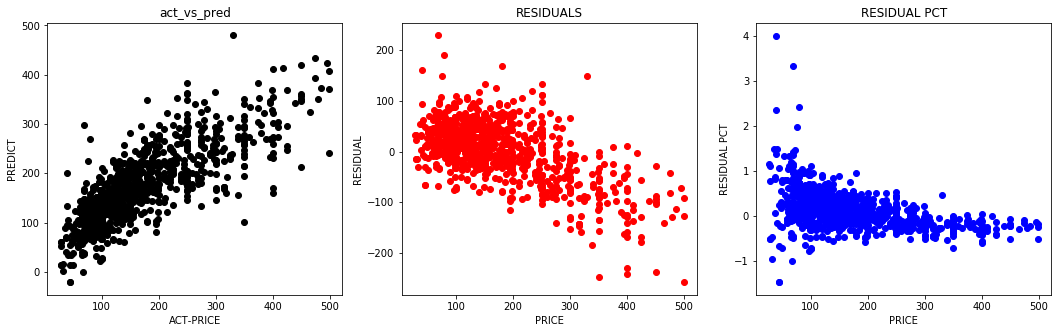

In [40]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(y_test, y_predsk,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('ACT-PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(dfpred.price,dfpred.sk_resid, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(dfpred.price,dfpred.sk_residpct, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

In [41]:
y_predsk

array([ 2.16192846e+02,  6.37590501e+01,  2.51897066e+02,  1.69179356e+01,
        4.96787224e+01,  2.44703591e+02,  1.29982810e+02,  2.40655362e+02,
        1.84560923e+02,  1.61318199e+02,  1.13597269e+02,  1.35141085e+02,
        8.22993451e+01,  2.46291191e+02,  1.41201269e+02,  7.18488312e+01,
        1.73031219e+02,  2.96786915e+02,  2.79176545e+02,  8.35185364e+01,
        1.79773929e+02,  1.67672693e+02,  2.42570126e+02,  1.41011820e+02,
        1.15691477e+02,  1.15976316e+02,  1.61318199e+02,  2.89712915e+01,
        1.41837850e+02,  1.48779102e+02,  1.68859881e+02,  1.62415863e+02,
        2.16867596e+02,  2.82064496e+02,  2.73098511e+02,  2.38945228e+02,
        2.26697242e+02,  1.00515643e+02,  2.75801649e+02,  1.76570032e+02,
        8.44106197e+01,  2.19302980e+02,  2.04425240e+02,  1.50331632e+02,
        1.19690905e+02,  1.85227223e+02,  3.43199910e+02,  1.44098901e+02,
        1.19089762e+02,  8.23572938e+01,  3.81903612e+01,  9.76680150e+01,
        1.41485951e+02,  

229.38310628865872


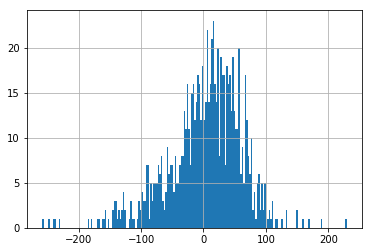

In [42]:
y_resdsk=(y_predsk-y_test)
print(y_resdsk.max())
y_resdsk.hist(bins =200)

390.27259333416146


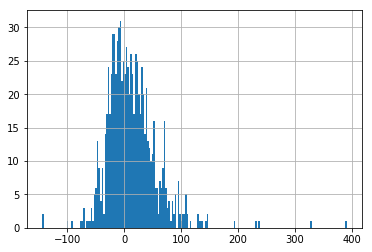

In [43]:
y_resdpct=(y_predsk-y_test)*100/(y_test+1)
print(y_resdpct.max())
y_resdpct.hist(bins =200)

In [44]:
purelst.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4.693000e+03,4.693000e+03,0.0,0.0,0.0,4.693000e+03,0.0,4693.000000,4693.000000,0.0,...,4693.000000,4388.000000,4387.000000,4388.000000,4386.000000,4387.000000,4386.000000,4385.000000,4693.000000,4409.000000
mean,1.223799e+07,2.018071e+13,NaN,NaN,NaN,3.528554e+07,NaN,6.305775,6.305775,NaN,...,53.894524,95.918870,9.804422,9.682999,9.896717,9.884659,9.656179,9.509236,3.878329,2.228133
std,8.396048e+06,0.000000e+00,NaN,NaN,NaN,4.901093e+07,NaN,15.889459,15.889459,NaN,...,72.671819,5.435221,0.517851,0.642335,0.404708,0.411208,0.595980,0.661416,8.424272,2.051256
min,9.580000e+02,2.018071e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,4.122671e+06,2.018071e+13,NaN,NaN,NaN,3.116172e+06,NaN,1.000000,1.000000,NaN,...,6.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.580000
50%,1.211083e+07,2.018071e+13,NaN,NaN,NaN,1.170307e+07,NaN,2.000000,2.000000,NaN,...,26.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.610000
75%,2.016987e+07,2.018071e+13,NaN,NaN,NaN,4.710047e+07,NaN,3.000000,3.000000,NaN,...,72.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,3.320000
max,2.657365e+07,2.018071e+13,NaN,NaN,NaN,1.998246e+08,NaN,188.000000,188.000000,NaN,...,601.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,61.000000,13.390000


In [45]:
# dflreg['price'][[dflreg['price']>500 & dflreg['price']<2000]].hist(bins=20);

In [46]:
pd.crosstab(purelst['bedrooms'], purelst['beds'])

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0
bedrooms,,,,,,,,,,,,
0,5,321,128,8,3,0,0,0,0,0,0,0
1,25,2084,533,68,25,6,0,0,1,0,0,1
2,13,11,561,193,67,9,4,2,0,0,0,0
3,8,5,17,238,137,38,17,3,0,0,0,0
4,7,1,0,0,51,44,14,8,5,0,0,0
5,1,0,0,0,0,9,2,2,5,1,0,0
6,0,0,0,0,0,0,2,1,1,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,1


In [47]:
all_columns = X_train.columns
all_columns

Index(['const', 'host_is_superhost', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee',
       'guests_included', 'room_type_full', 'room_type_pvt', 'amentcnt',
       'min_night_stay_long', 'min_night_stay_mid', 'ppt_condensed_apt',
       'ppt_condensed_aptspl', 'ppt_condensed_auto', 'ppt_condensed_hostel',
       'ppt_condensed_hotel', 'ppt_condensed_house', 'ppt_condensed_other',
       'zipcode_94014.0', 'zipcode_94015.0', 'zipcode_94102.0',
       'zipcode_94103.0', 'zipcode_94104.0', 'zipcode_94105.0',
       'zipcode_94107.0', 'zipcode_94108.0', 'zipcode_94109.0',
       'zipcode_94110.0', 'zipcode_94111.0', 'zipcode_94112.0',
       'zipcode_94114.0', 'zipcode_94115.0', 'zipcode_94116.0',
       'zipcode_94117.0', 'zipcode_94118.0', 'zipcode_94121.0',
       'zipcode_94122.0', 'zipcode_94123.0', 'zipcode_94124.0',
       'zipcode_94127.0', 'zipcode_94129.0', 'zipcode_94131.0',
       'zipcode_94132.0', 'zipcode_94133.0

In [48]:
for col in all_columns:
    dfscat.plot(kind='scatter', y='price', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

NameError: name 'dfscat' is not defined